# EDA/Mid report

"In this phase, you will be preparing your dataset using data cleaning and EDA techniques. You will prepare a
write-up on Medium where you will have to explain what steps you took throughout the process and their reason.
For reference, you can see some sample articles attached at the end of this document. The purpose of this exercise
is to get you to learn the art of storytelling with the data."

This notebook is a log of all the steps taken for Data Cleaning and EDA for our dataset.

## Introduction to the Dataset
The dataset used in this analysis is the IBM HR Analytics Employee Attrition dataset, which contains information about employees in a company and their attrition status—whether they left the company (Attrition = Yes) or stayed (Attrition = No). This dataset is often used for predicting employee turnover and identifying factors contributing to attrition.

The dataset includes 35 features, such as:

Demographics: Age, gender, marital status, education level, and more.

Job-related Information: Job role, job satisfaction, work-life balance, and years at the company.

Employee Performance: Monthly income, salary hike, and performance ratings.

Company Information: Department, business travel, and whether employees work overtime.

The goal of this analysis is to identify key patterns and relationships in the dataset that influence whether an employee stays with or leaves the company, which will inform future predictive modeling.

## Step 1: Data Cleaning
This is the first step of EDA, where we check for issues like missing values, duplicate rows, and incorrect data types, and we address them.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Displaying all columns to verify the correctness of each column
pd.set_option('display.max_columns', None)  # This will display all columns in the dataframe
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


### 1.1 Handling Missing Data
We checked for missing values in the dataset and chose to drop rows with missing data instead of imputing values.

In [2]:
# Checking for missing values in the dataset
# print(df.isnull().sum())

# Dropping rows with missing values in any column
df = df.dropna()
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


### 1.2 Removing Duplicates
We found that there were no duplicate rows in the dataset, so no action was needed here. However, we found that the column "EmployeeCount" value is always 1 for each row in the dataset. Similarly, the column "Over18" value is always Y and the column "StandardHours" is 80 for all entries. So we decided to drop the columns. 

In [3]:
df.duplicated().sum()

# Dropping the 'EmployeeCount' column from the dataframe
df = df.drop(columns=['EmployeeCount'])
df = df.drop(columns=['Over18'])
df = df.drop(columns=['StandardHours'])

# Verifying the column has been removed
# df.head()

### 1.3 Handling Outliers
Outliers were identified using box plots for numerical columns like 'YearsAtCompany' and 'DistanceFromHome'. After reviewing these outliers, we decided to retain them as they might be important for analysis.

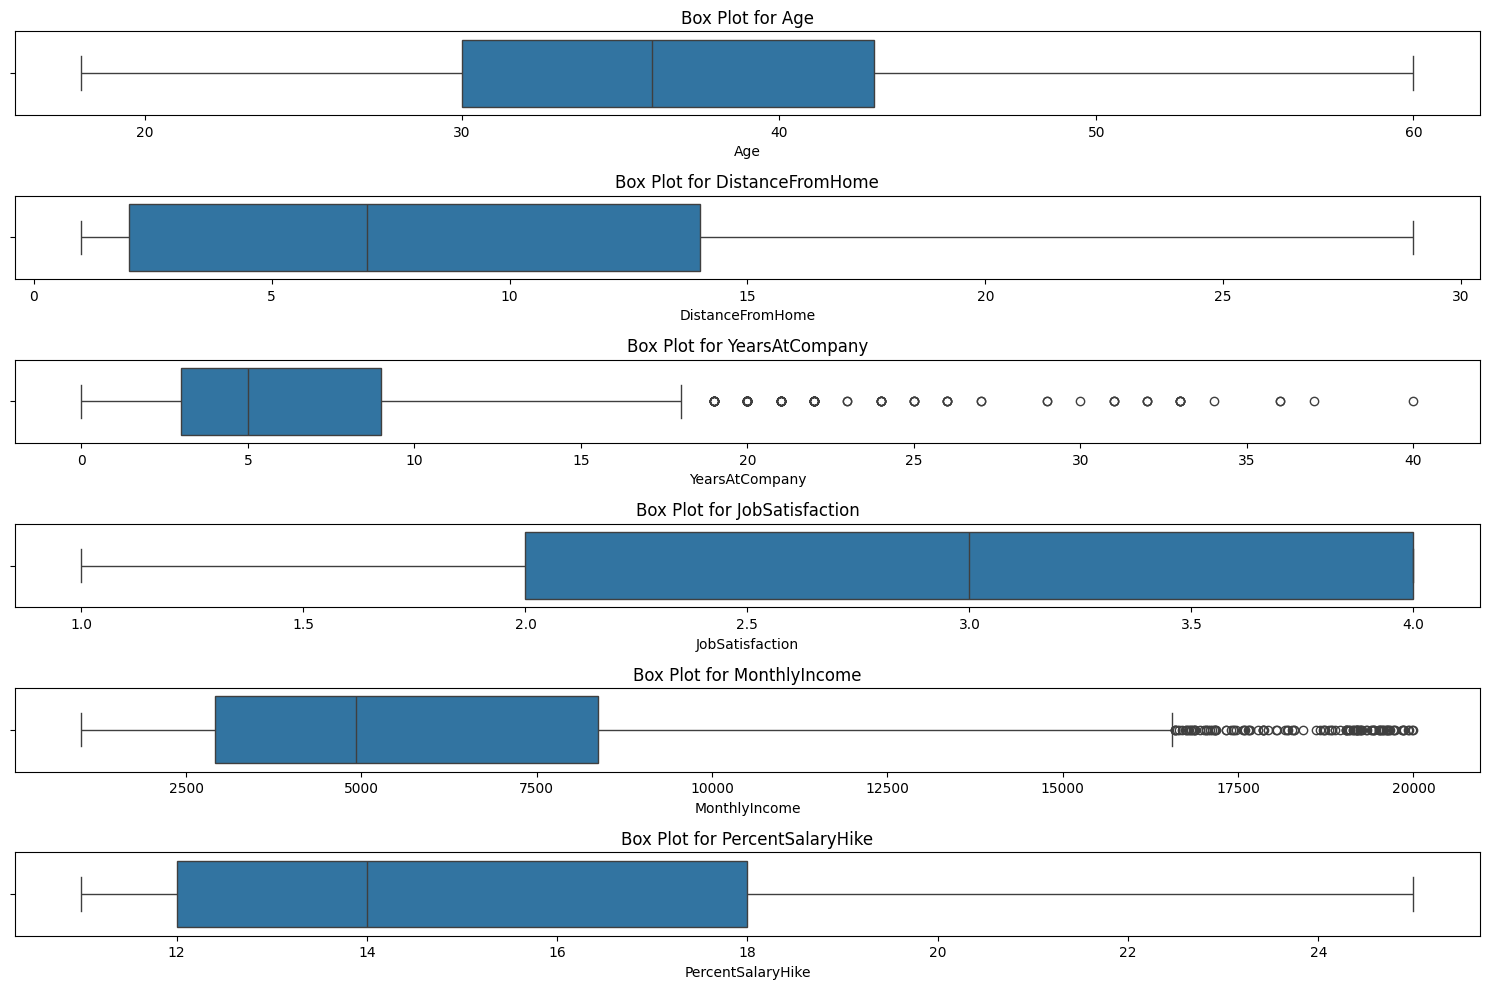

In [4]:
# List of numerical columns to create boxplots for
numerical_columns = ['Age', 'DistanceFromHome', 'YearsAtCompany', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike']

# Create boxplots for each relevant numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(6, 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.tight_layout()

plt.show()


### 1.4 Correcting Data Types
We ensured that the columns had the appropriate data types. For example:

The 'Attrition' column was encoded as binary values (0 for "No" and 1 for "Yes").

Numerical columns like 'Age', 'DistanceFromHome' were set to integers or floats.

##### 1. Categorical Data

In [5]:
# Converting 'Attrition' column to binary (0 = No, 1 = Yes)
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Converting other categorical columns (e.g., 'OverTime', 'Gender', 'JobRole', etc.)
df['OverTime'] = df['OverTime'].map({'No': 0, 'Yes': 1})  # Binary encoding for 'OverTime'

# Display data types to verify the changes
# df.dtypes

df.head()  # View the first few rows to verify the columns and their values


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


#### 2. Numerical Data

In [6]:
# Ensuring that numerical columns are properly set as integers or floats
df['Age'] = df['Age'].astype(int)
df['DistanceFromHome'] = df['DistanceFromHome'].astype(int)
df['YearsAtCompany'] = df['YearsAtCompany'].astype(int)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(float)
df['MonthlyIncome'] = df['MonthlyIncome'].astype(float)
df['PercentSalaryHike'] = df['PercentSalaryHike'].astype(float)

# Display data types to verify the changes
# df.dtypes

df.head()  # View the first few rows to verify the columns and their values

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4.0,Single,5993.0,19479,8,1,11.0,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2.0,Married,5130.0,24907,1,0,23.0,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3.0,Single,2090.0,2396,6,1,15.0,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3.0,Married,2909.0,23159,1,1,11.0,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2.0,Married,3468.0,16632,9,0,12.0,3,4,1,6,3,3,2,2,2,2


#### 1.3 One-Hot Encoding
For the categorical variables that contained multiple categories, we applied One-Hot Encoding to convert these variables into numerical format. One-Hot Encoding creates separate binary (0 or 1) columns for each category within the variable, ensuring that no ordinal relationships are mistakenly implied.

In [7]:
# Applying One-Hot Encoding to the relevant categorical columns
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Gender'], drop_first=True)

# Verifying the changes by checking the first few rows
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Gender_Male
0,41,1,1102,1,2,1,2,94,3,2,4.0,5993.0,19479,8,1,11.0,3,1,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1,49,0,279,8,1,2,3,61,2,2,2.0,5130.0,24907,1,0,23.0,4,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
2,37,1,1373,2,2,4,4,92,2,1,3.0,2090.0,2396,6,1,15.0,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,5,4,56,3,1,3.0,2909.0,23159,1,1,11.0,3,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,27,0,591,2,1,7,1,40,3,1,2.0,3468.0,16632,9,0,12.0,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True


## Step 2: Exploratory Data Analysis (EDA)

### 2.1 Descriptive Statistics
We computed summary statistics, involving metrics such as mean, median, and standard deviation for the numerical columns using the desribe() method.

In [8]:
# df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 2.2 Visualizing the Data

We used visualizations to explore the distribution of the data and relationships between key variables.

#### Histograms

We created histograms for variables like 'Age', 'DistanceFromHome', and 'YearsAtCompany' to understand their distributions.

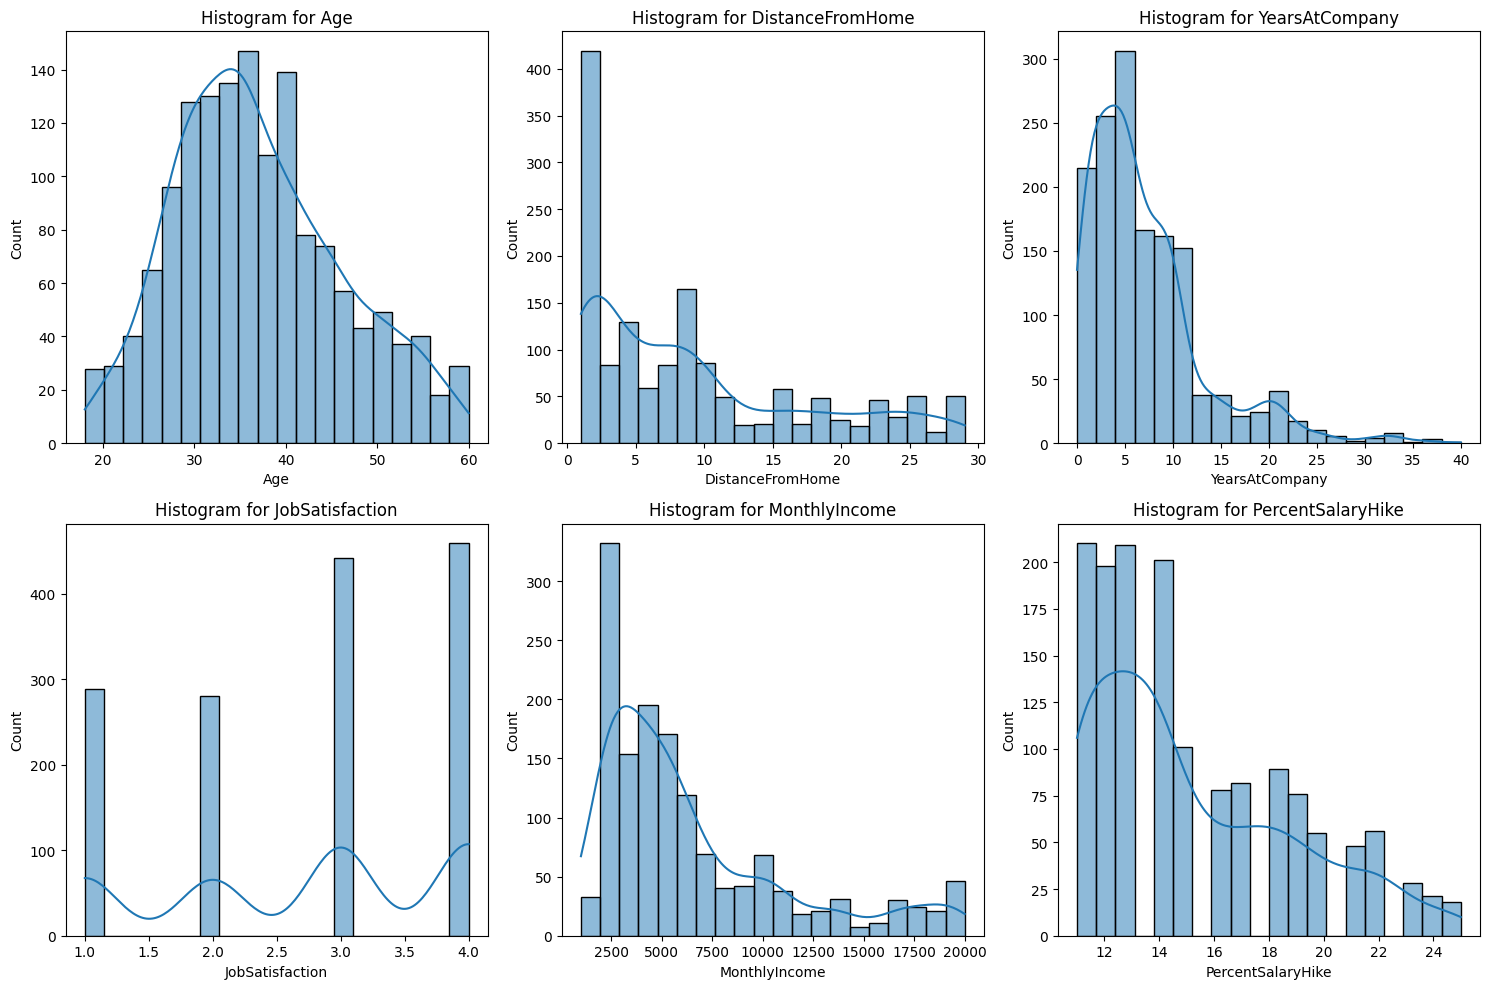

In [9]:
# Create histograms for the relevant numerical columns
numerical_columns = ['Age', 'DistanceFromHome', 'YearsAtCompany', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram for {col}')
    plt.tight_layout()

plt.show()

#### Bar Plots

We created bar plots to explore the relationship between categorical variables and Attrition. For instance, the OverTime vs. Attrition bar plot.

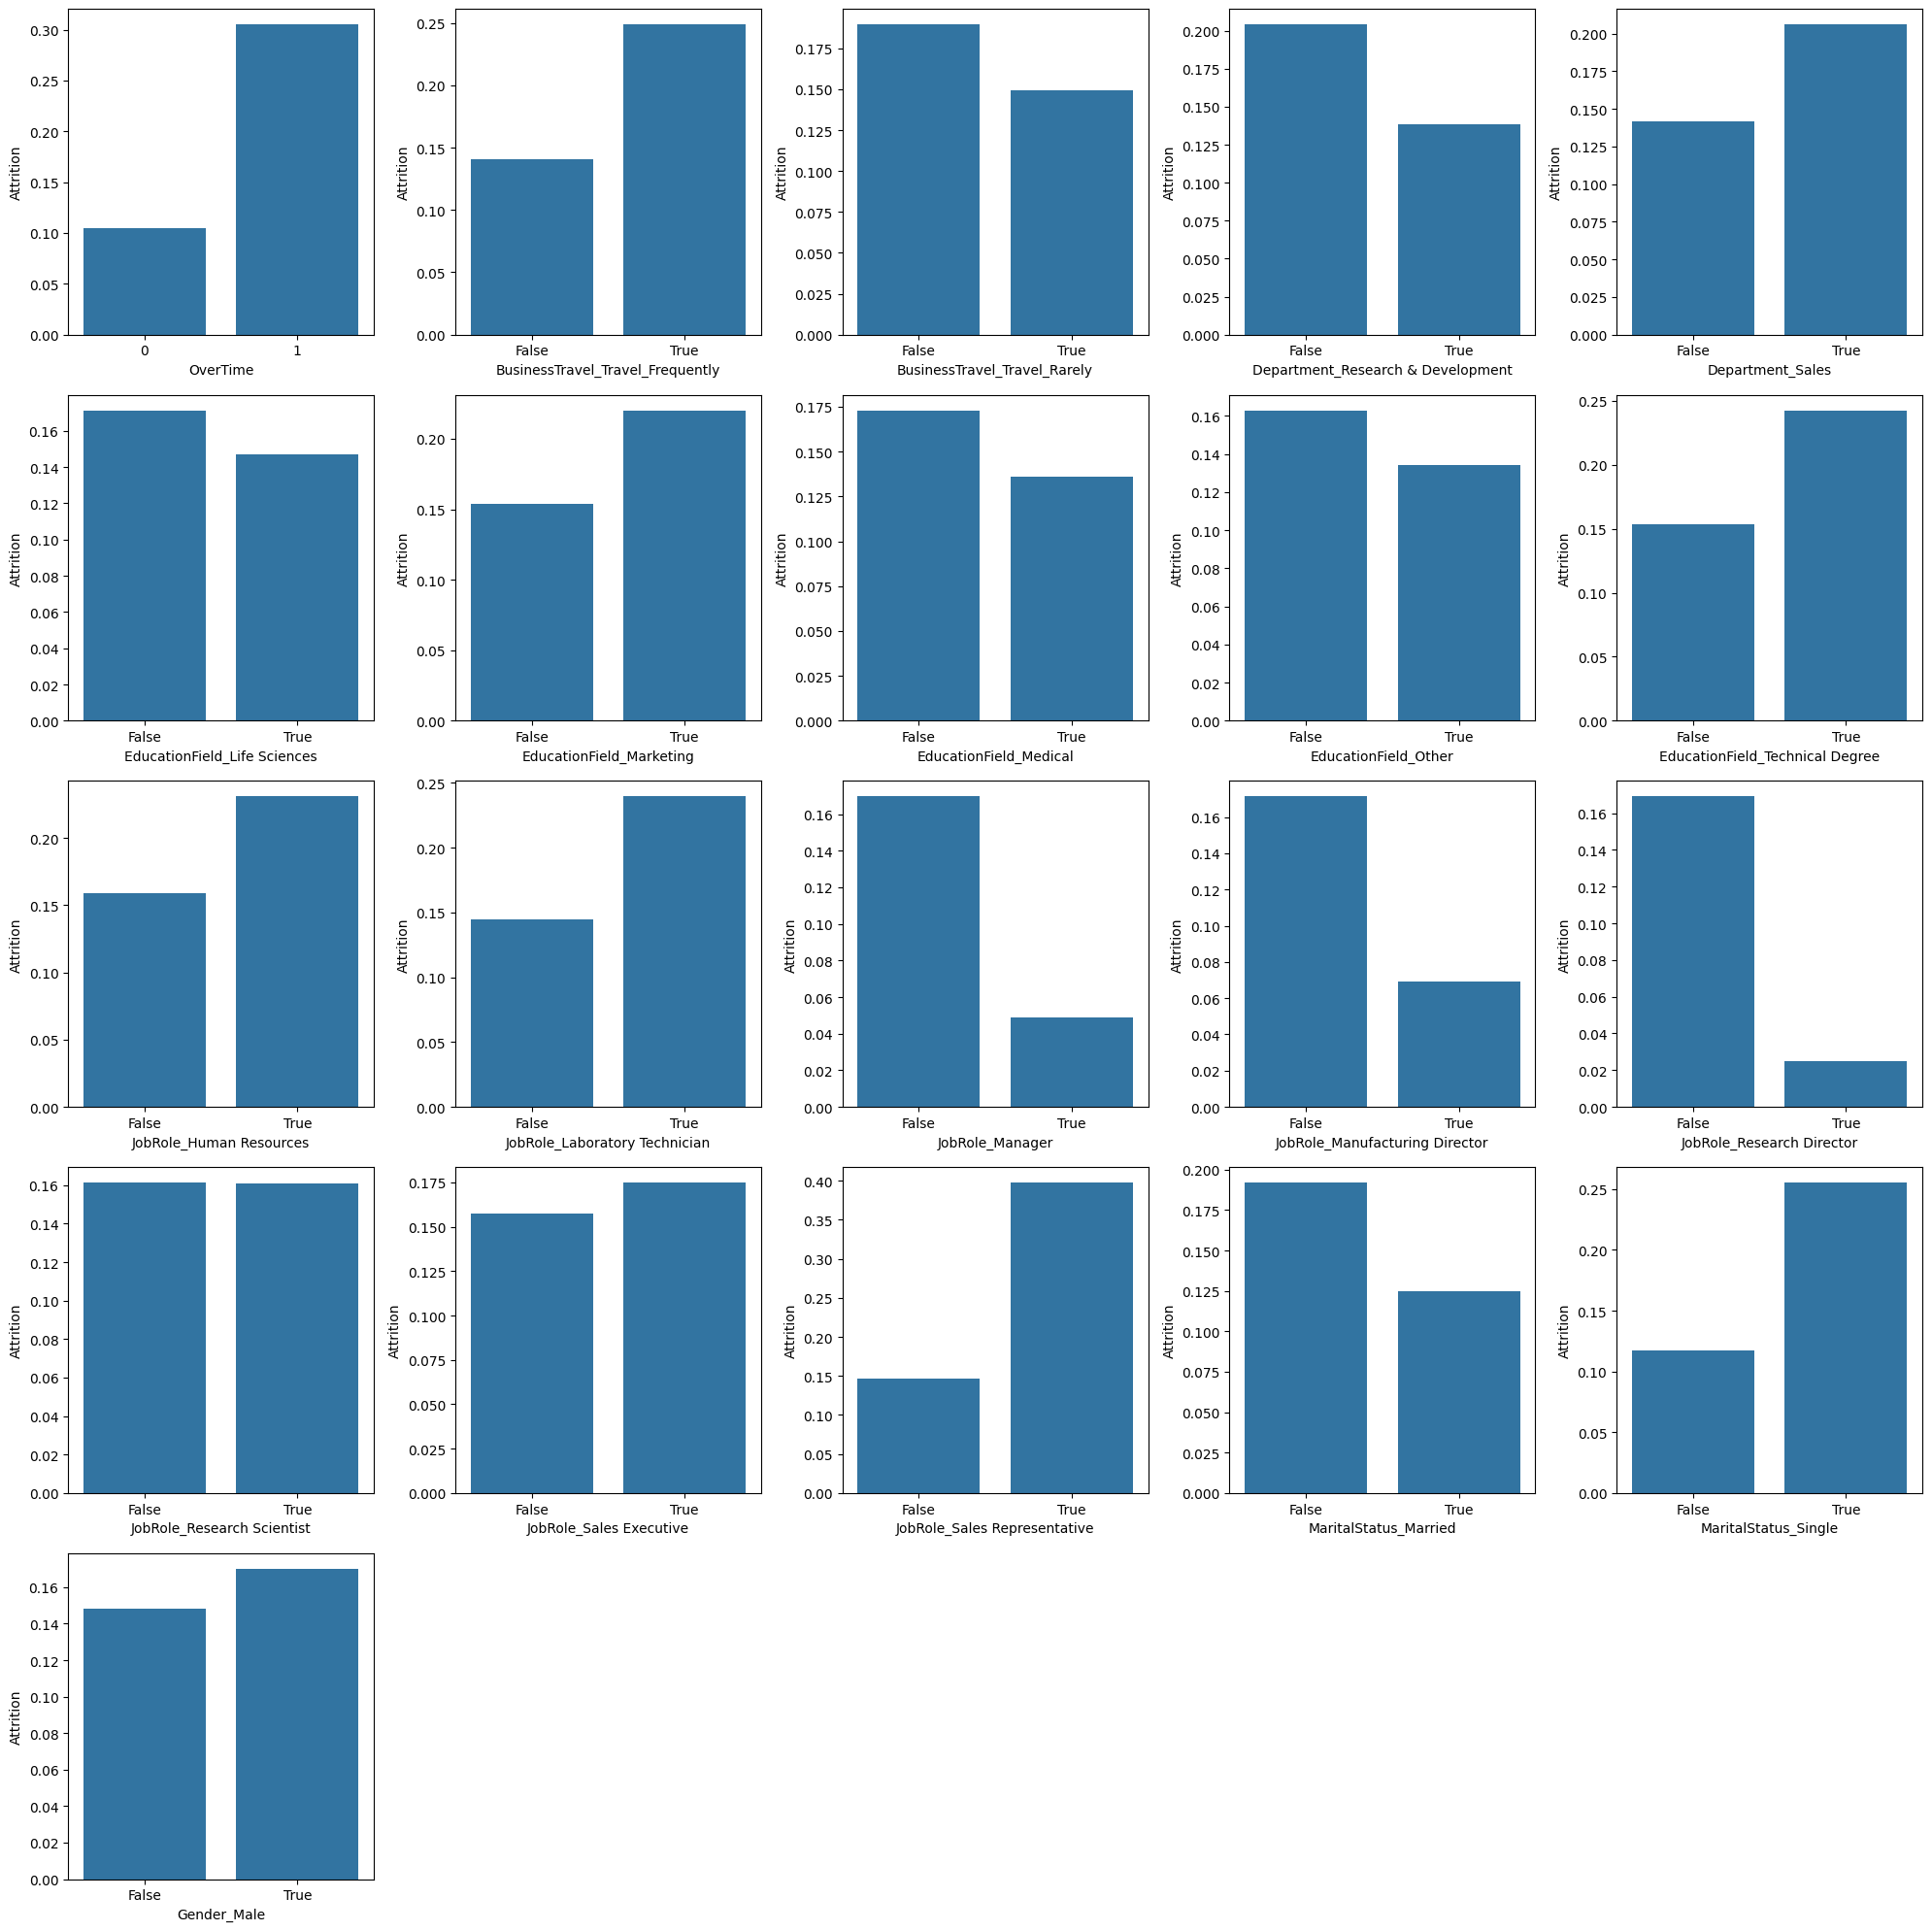

In [10]:
# Update the list of categorical columns to use the correct One-Hot Encoded names for 'MaritalStatus'
categorical_columns_with_correct_names = [
    'OverTime', 
    'BusinessTravel_Travel_Frequently', 
    'BusinessTravel_Travel_Rarely', 
    'Department_Research & Development', 
    'Department_Sales', 
    'EducationField_Life Sciences', 
    'EducationField_Marketing', 
    'EducationField_Medical', 
    'EducationField_Other', 
    'EducationField_Technical Degree', 
    'JobRole_Human Resources', 
    'JobRole_Laboratory Technician', 
    'JobRole_Manager', 
    'JobRole_Manufacturing Director', 
    'JobRole_Research Director', 
    'JobRole_Research Scientist', 
    'JobRole_Sales Executive', 
    'JobRole_Sales Representative', 
    'MaritalStatus_Married', 
    'MaritalStatus_Single', 
    'Gender_Male'
]

# Adjusting the subplot grid to 5x5 to accommodate all bar plots
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns_with_correct_names, 1):
    plt.subplot(5, 5, i)  # Arrange bar plots in a 5x5 grid
    sns.barplot(x=col, y='Attrition', data=df, errorbar=None)
    # plt.title(f'Bar Plot for {col}') # understood that it is v/s Attrition
    plt.tight_layout()

plt.show()

#### Box Plots
We visualized the relationship between relevant columns and 'Attrition' using box plots. These box plots visually highlight how each numerical variable differs between employees who stayed (Attrition = 0) and those who left (Attrition = 1).

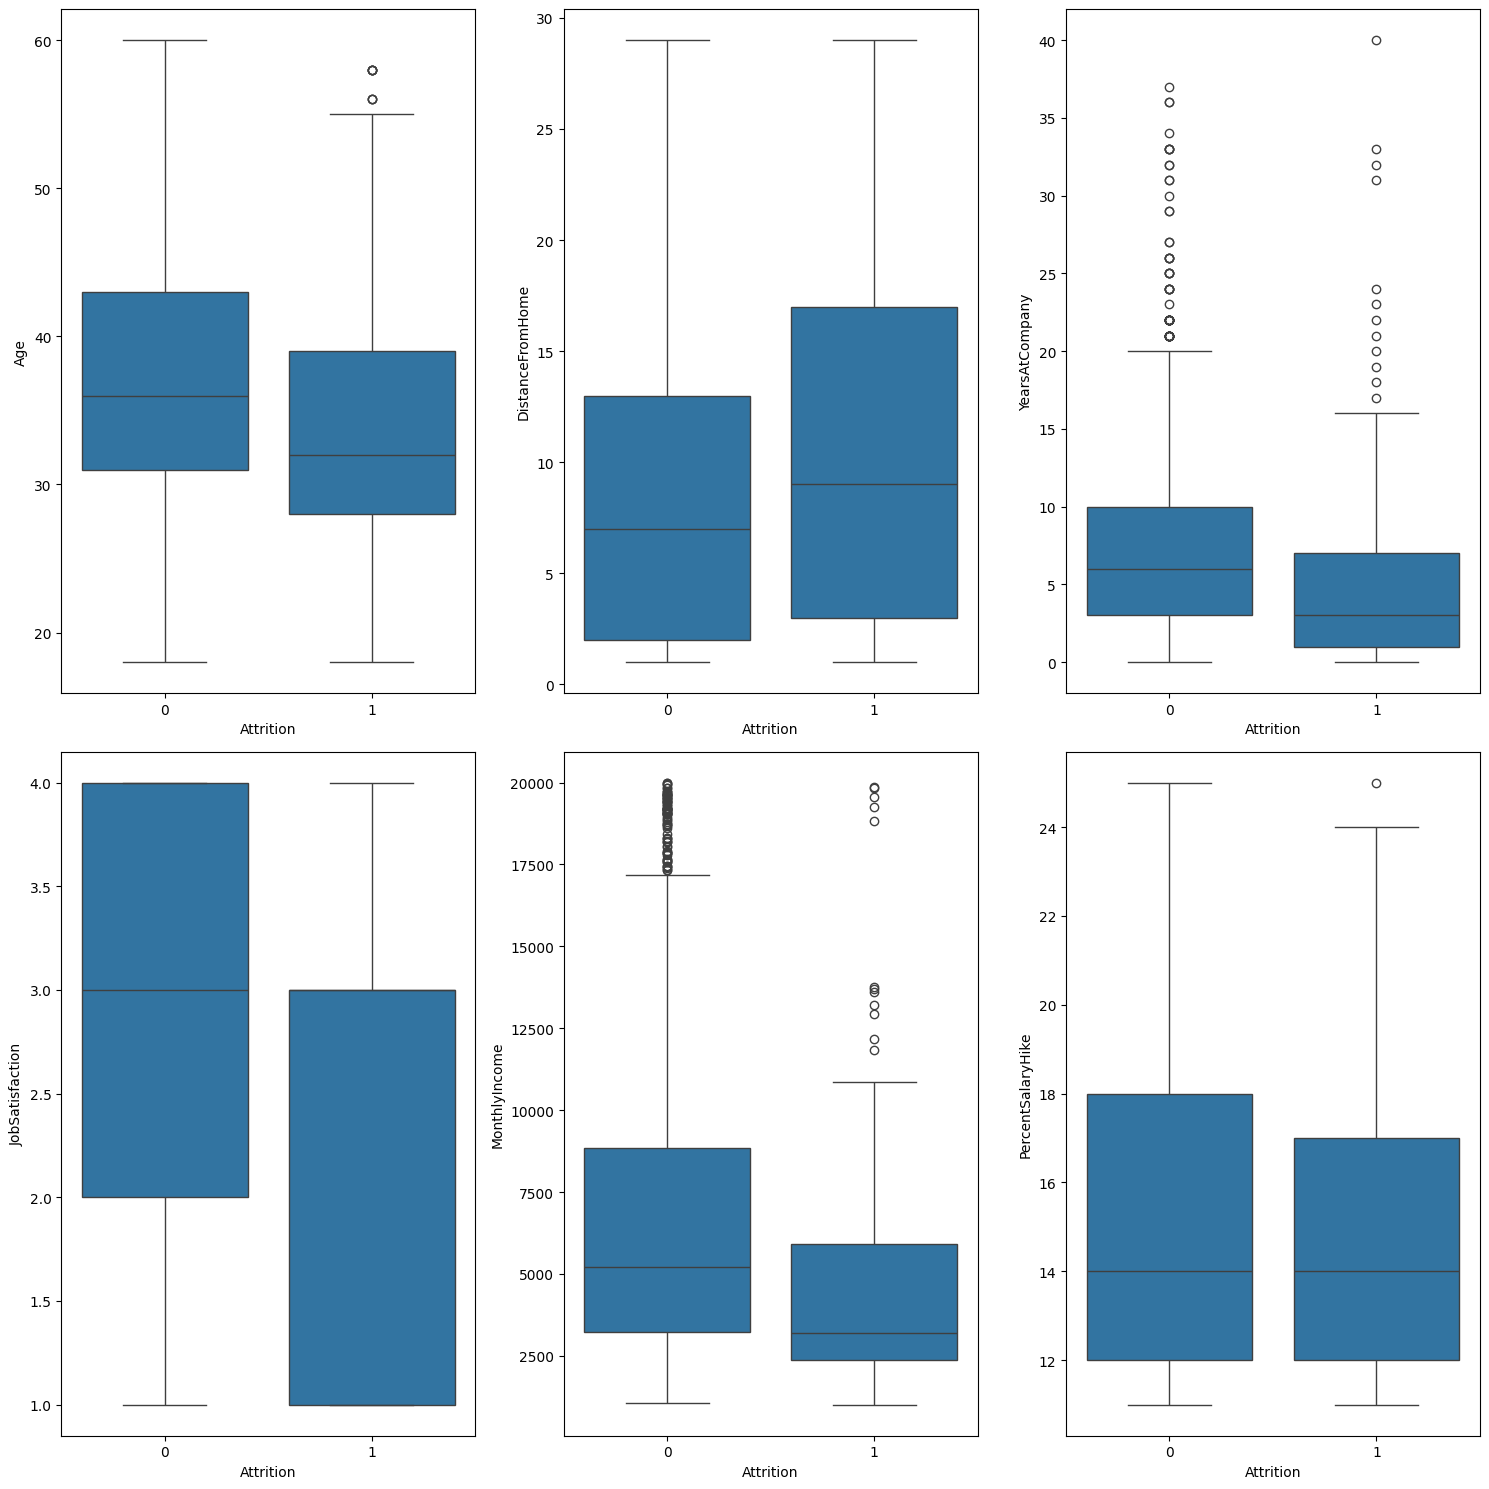

In [11]:
# Create box plots for each relevant numerical column against 'Attrition'
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Arrange box plots in a 2x3 grid
    sns.boxplot(x='Attrition', y=col, data=df)
    # plt.title(f'Box Plot for {col} vs Attrition') # understood it's vs Attrition
    plt.tight_layout()

plt.show()


#### Correlation Heatmap
We computed the correlation matrix to understand the relationships between numerical variables.

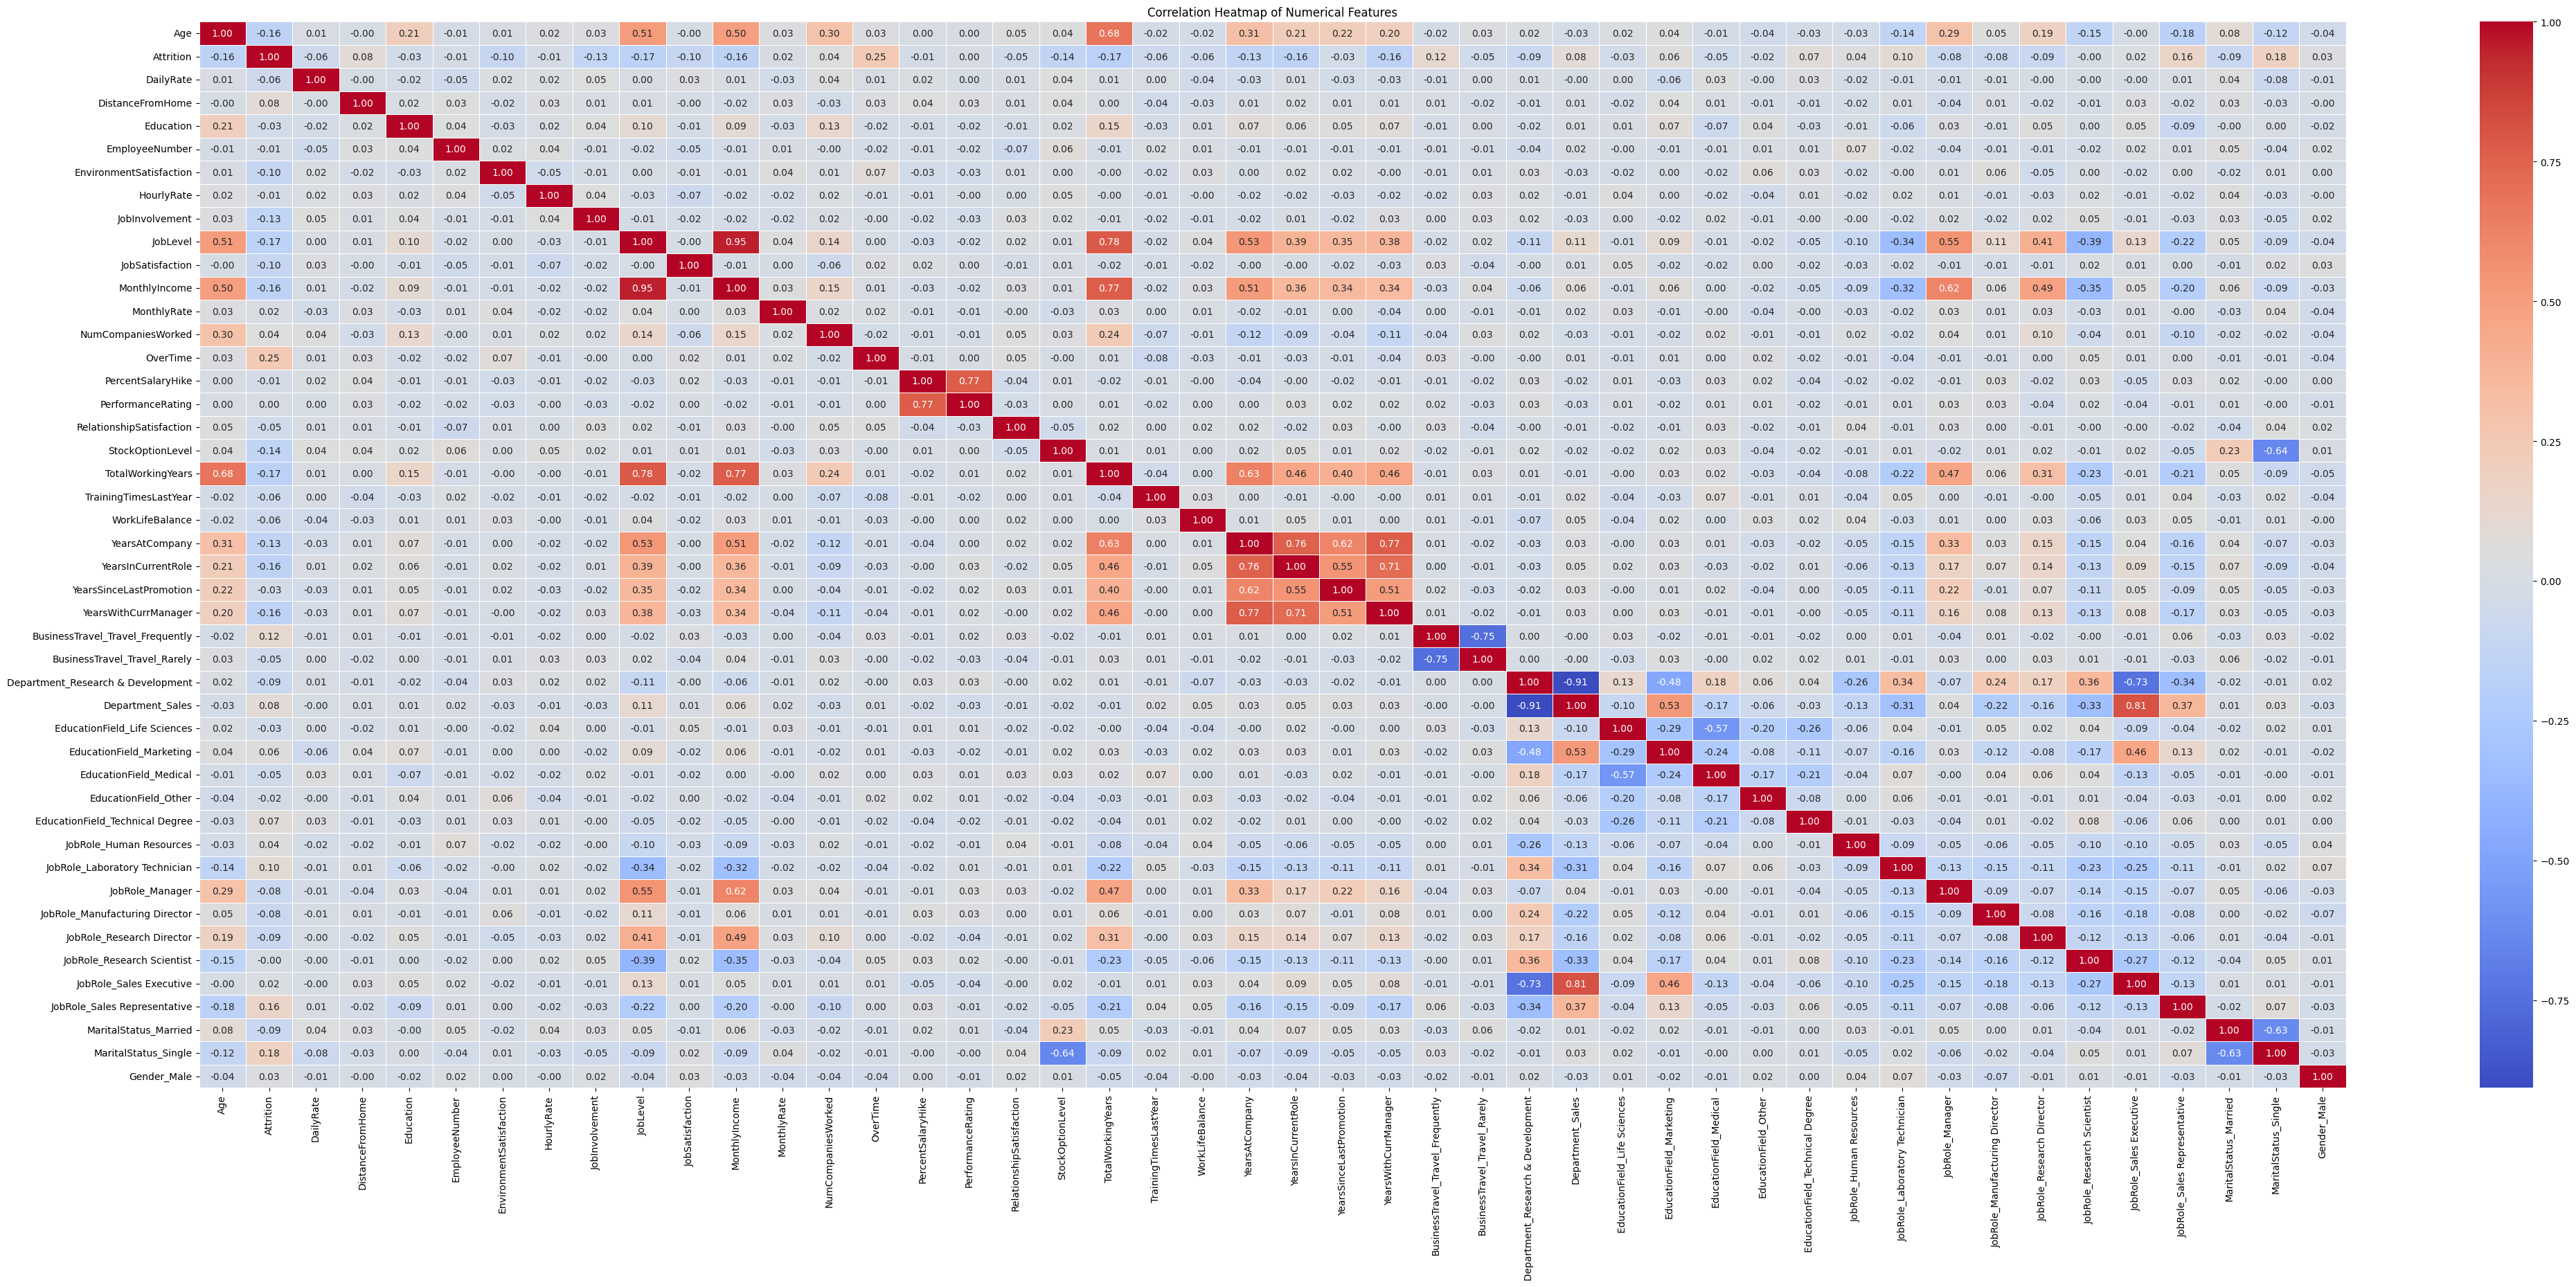

In [12]:
# Correlation matrix and heatmap
corr = df.corr()
plt.figure(figsize=(50, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 2.3 Identifying Key Patterns

Through the Exploratory Data Analysis (EDA) and various visualizations, we observed several key patterns in the dataset that shed light on factors influencing employee attrition.

Here are the key patterns identified:

1. Job Satisfaction:

- Employees with lower job satisfaction tend to leave the company more frequently. This is evident in both the box plots and the correlation matrix, where JobSatisfaction is inversely related to Attrition. A lower JobSatisfaction score seems to correlate strongly with higher Attrition.

2. OverTime:

- Surprisingly, employees who work overtime tend to stay with the company. This was counterintuitive, as we initially assumed overtime might lead to higher attrition. However, the bar plot and correlation matrix show that employees working overtime were more likely to stay.

3. Years at Company:

- Employees with fewer years at the company are more likely to leave. The box plot for 'YearsAtCompany' vs Attrition revealed that employees who left the company had fewer years at the company, with a noticeable median difference. The correlation matrix also shows a weak negative correlation between YearsAtCompany and Attrition.

4. Monthly Income:

- There is a noticeable difference in MonthlyIncome between employees who stayed and those who left, with the box plot showing higher income for employees who stayed. This suggests that compensation may play a significant role in employee retention.

5. Percent Salary Hike:

- Employees with higher salary hikes tend to stay longer at the company. This is an important factor in employee retention. Higher salary increases may indicate better job satisfaction or career growth opportunities, leading to lower attrition rates.

#### Conclusion:
The EDA revealed several valuable insights into factors contributing to employee attrition:

Job satisfaction, overtime, years at the company, and salary factors all appear to have significant relationships with attrition.

These patterns will help guide the development of a predictive model for employee retention and attrition.

### 2.4 Model Training
In this section, we build and train a predictive model to classify whether an employee is likely to leave the company (Attrition = Yes) or stay (Attrition = No). Based on the insights derived from the Exploratory Data Analysis (EDA), we selected a set of key features that showed significant relationships with the target variable.

We use Logistic Regression as our classification algorithm, as it is well-suited for binary classification problems like this one and provides interpretable coefficients that indicate the direction and strength of each feature's influence on attrition.

The following steps are covered:

1. Splitting the dataset into training and testing sets using an 80-20 ratio
2. Training the logistic regression model on the selected features
3. Evaluating model performance using standard classification metrics

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)
from sklearn.metrics import confusion_matrix
import seaborn as sns

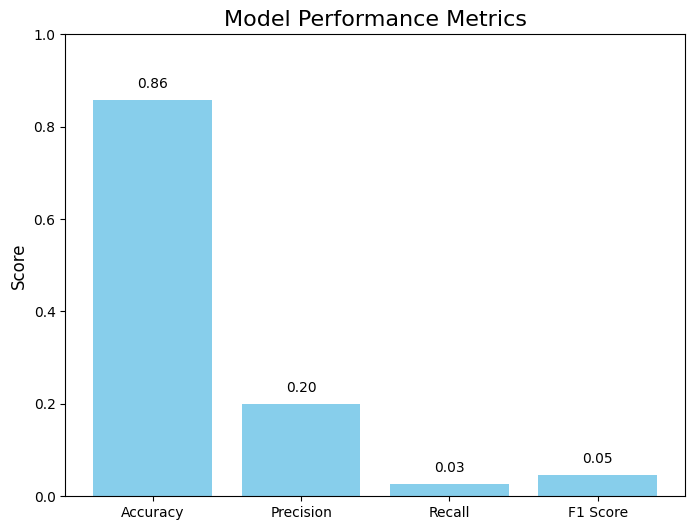

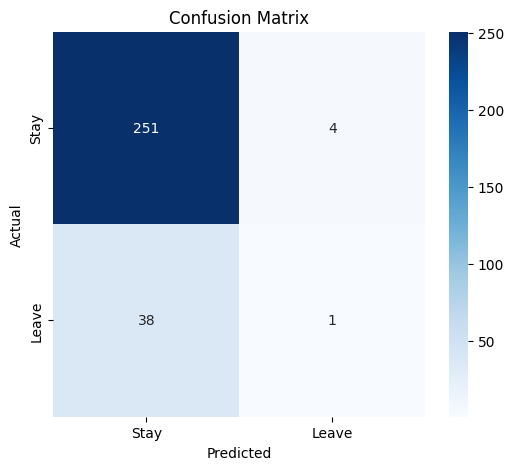


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.20      0.03      0.05        39

    accuracy                           0.86       294
   macro avg       0.53      0.50      0.48       294
weighted avg       0.78      0.86      0.81       294



In [14]:
#the selected features:
selected_features=['JobSatisfaction','OverTime','YearsAtCompany','MonthlyIncome','PercentSalaryHike']
#the target is "Attrition":
y=df['Attrition'] 
X=df[selected_features]

#now we split the dataset randomly into training and testing sets with 80-20 ratio:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#we train the model using logistic regression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

#we evaluate here:
metrics={
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
}

plt.figure(figsize=(8, 6))
bars=plt.bar(metrics.keys(),metrics.values(),color='skyblue')
plt.title('Model Performance Metrics',fontsize=16)
plt.ylabel('Score',fontsize=12)
plt.ylim(0,1)
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2.0,yval+0.02,f'{yval:.2f}',ha='center',va='bottom',fontsize=10)
plt.show()


cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Stay','Leave'],yticklabels=['Stay','Leave'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n",classification_report(y_test, y_pred))

#### Conclusion:
Despite achieving a high overall accuracy of 85%, the initial results of the logistic regression model revealed significant class imbalance issues. The model demonstrated poor performance in identifying employees who left the company (Attrition = Yes), with a precision of only 14.28% and a recall of just 2.56%. This indicates that while the model correctly predicted most of the employees who stayed, it failed to capture those who left, resulting in a high number of false negatives. The confusion matrix further highlights this imbalance, with only 1 correct prediction out of 39 actual attritions. Such skewed predictions are expected in datasets where one class significantly outweighs the other.

To address this imbalance, we will re-train the logistic regression model using the class_weight='balanced' parameter. This approach will adjust the weights of the classes inversely proportional to their frequency, ensuring that the minority class (Attrition = Yes) is given greater importance during training. This modification will help improve the model’s ability to detect attrition cases more effectively, even if it slightly impacts overall accuracy.

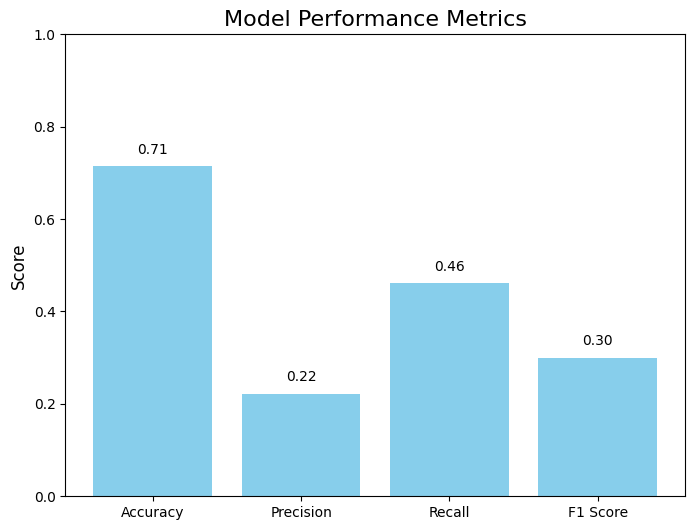

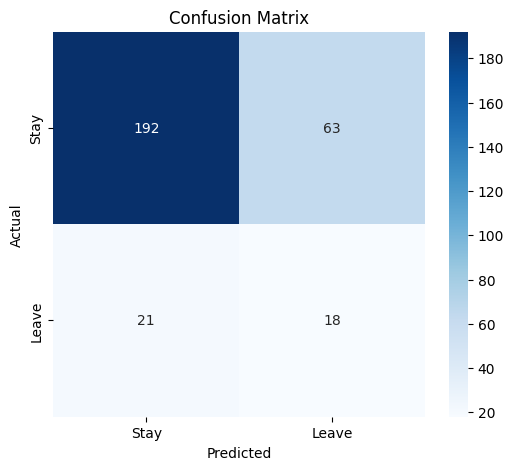


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       255
           1       0.22      0.46      0.30        39

    accuracy                           0.71       294
   macro avg       0.56      0.61      0.56       294
weighted avg       0.81      0.71      0.75       294



In [15]:
model=LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


metrics={
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
}

plt.figure(figsize=(8, 6))
bars=plt.bar(metrics.keys(),metrics.values(),color='skyblue')
plt.title('Model Performance Metrics',fontsize=16)
plt.ylabel('Score',fontsize=12)
plt.ylim(0,1)
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2.0,yval+0.02,f'{yval:.2f}',ha='center',va='bottom',fontsize=10)
plt.show()


cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Stay','Leave'],yticklabels=['Stay','Leave'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n",classification_report(y_test, y_pred))

### Conclusion:
After implementing the class_weight='balanced' parameter in the logistic regression model, the performance improved significantly compared to the initial model. The accuracy dropped slightly to 72.79%, which is expected in class-imbalanced problems but still remains relatively high. More importantly, the precision and recall for the minority class (Attrition = Yes) improved by a lot. The recall increased to 41%, meaning the model now identifies around 41% of the employees who are likely to leave, compared to just 2.6% in the original model. While precision, 22%, still remains lower than ideal, the model has become more sensitive to attrition cases without being overly biased toward the majority class. The confusion matrix now shows fewer false negatives, with the model correctly predicting 16 employees who left the company, indicating progress in capturing attrition cases.

These results suggest that the class-weight adjustment has helped the model focus more on detecting employee attrition, making it a better fit for our predictive goals.